## 1.Binomial Logistic regression: 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [4]:
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [5]:
acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 96.49%


## 2.Multinomial Logistic Regression:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

In [7]:
digits = datasets.load_digits()

X = digits.data
y = digits.target

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
reg = LogisticRegression(max_iter=10000,random_state=0)
reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [11]:
y_pred = reg.predict(X_test)

print(f"Logistic Regression model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

Logistic Regression model accuracy: 97.50%


## Confusion Matrix in Machine Learning

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
actual    = np.array(
  ['Dog','Dog','Dog','Not Dog','Dog','Not Dog','Dog','Dog','Not Dog','Not Dog'])
predicted = np.array(
  ['Dog','Not Dog','Dog','Not Dog','Dog','Dog','Dog','Dog','Not Dog','Not Dog'])

In [14]:
cm = confusion_matrix(actual,predicted)

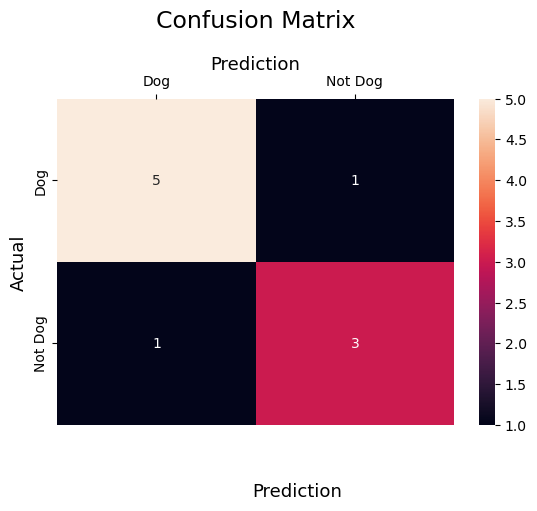

In [18]:
sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Dog','Not Dog'],
           yticklabels=['Dog','Not Dog'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [19]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

         Dog       0.83      0.83      0.83         6
     Not Dog       0.75      0.75      0.75         4

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



## Confusion Matrix for Multi-Class classification using Python

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [21]:
y_true = ['Cat'] * 10 + ['Dog'] * 12 + ['Horse'] * 10
y_pred = ['Cat'] * 8 + ['Dog'] + ['Horse'] + ['Cat'] * 2 + ['Dog'] * 10 + ['Horse'] * 8 + ['Dog'] * 2
classes = ['Cat', 'Dog', 'Horse']

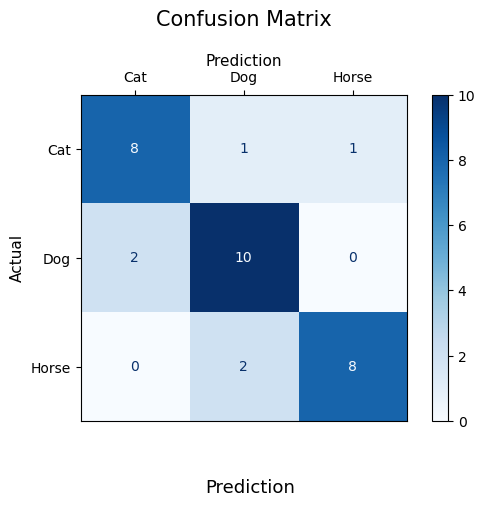

In [22]:
cm = confusion_matrix(y_true, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

plt.show()

In [23]:
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

         Cat       0.80      0.80      0.80        10
         Dog       0.77      0.83      0.80        12
       Horse       0.89      0.80      0.84        10

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32



## Implementing F1 Score in Python

In [24]:
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0]
y_pred = [0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1]

f1_per_class = f1_score(y_true, y_pred, average=None)
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print("F1 score per class:", f1_per_class)
print("Micro-average F1 score:", f1_micro)
print("Macro-average F1 score:", f1_macro)
print("Weighted-average F1 score:", f1_weighted)

F1 score per class: [0.66666667 0.28571429 0.66666667]
Micro-average F1 score: 0.5454545454545454
Macro-average F1 score: 0.5396825396825397
Weighted-average F1 score: 0.5627705627705627


## AUC ROC Curve in Machine Learning

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [26]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]

In [29]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_logistic, 'RandomForest': y_pred_rf})

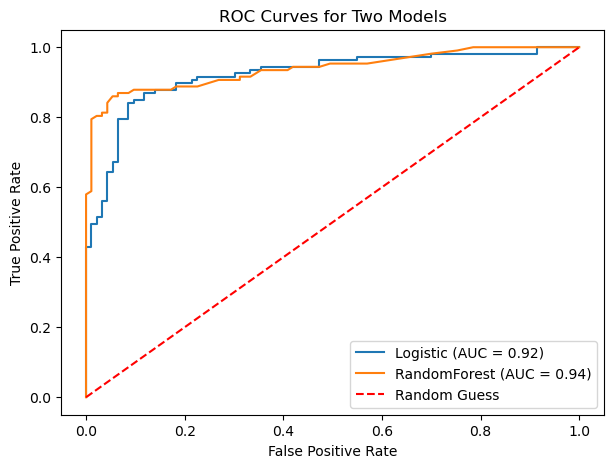

In [30]:
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

### ROC-AUC for a Multi-Class Model

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [32]:
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)

y_bin = label_binarize(y, classes=np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42)

In [33]:
logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, y_train)

rf_model = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

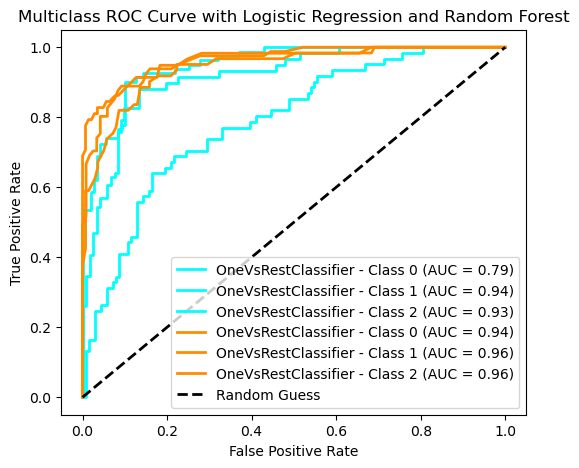

In [34]:
fpr = dict()
tpr = dict()
roc_auc = dict()

models = [logistic_model, rf_model]

plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])

for model, color in zip(models, colors):
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{model.__class__.__name__} - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and Random Forest')
plt.legend(loc="lower right")
plt.show()

# Cross Validation in Machine Learning

In [35]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [36]:
iris = load_iris()
X, y = iris.data, iris.target

In [37]:
svm_classifier = SVC(kernel='linear')

In [38]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [39]:
cross_val_results = cross_val_score(svm_classifier, X, y, cv=kf)

In [40]:
print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results (Accuracy):
  Fold 1: 100.00%
  Fold 2: 100.00%
  Fold 3: 96.67%
  Fold 4: 93.33%
  Fold 5: 96.67%
Mean Accuracy: 97.33%


# Hyperparameter Tuning

## 1.GridSearchCV 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': np.float64(0.006105402296585327)}
Best score is 0.853


## 2.RandomizedSearchCV 

In [42]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 5}
Best score is 0.813


## 3.Bayesian Optimization

P(score(y)∣hyperparameters(x))